In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


$$H_{0}: CTR_{new} \leq CTR_{old}$$

$$H_{1}: CTR_{new} > CTR_{old}$$

In [2]:
# Create a new df for the control group
control_df = df.query("group == 'control'")

# CTR for the control group: CTR = unique clicks / unique views
control_ctr = control_df.query("action =='click'").id.nunique() / control_df.query("action =='view'").id.nunique()

# View the result
control_ctr

0.2797118847539016

In [3]:
# Create a new df for the experiment group
experiment_df = df.query("group == 'experiment'")

# CTR for the experiment group: CTR = unique clicks / unique views
experiment_ctr = experiment_df.query("action =='click'").id.nunique() / experiment_df.query("action =='view'").id.nunique()

# View the result
experiment_ctr

0.3097463284379172

In [4]:
# Diff in CTR between Experiment group and Control group
obs_diff = experiment_ctr - control_ctr
obs_diff

0.030034443684015644

In [5]:
diffs = []
for _ in range(10000):
    
    # bootstrap sampling
    b_samp = df.sample(df.shape[0], replace = True)
    
    # dataframe of control group vs. experiment group
    control_df = b_samp.query("group == 'control'")
    experiment_df = b_samp.query("group == 'experiment'")
    
    # CTR of control group vs. experiment group
    control_ctr = control_df.query("action =='click'").id.nunique() / control_df.query("action =='view'").id.nunique()
    experiment_ctr = experiment_df.query("action =='click'").id.nunique() / experiment_df.query("action =='view'").id.nunique()
    
    # append the CTR diff to diffs
    diffs.append(experiment_ctr-control_ctr)

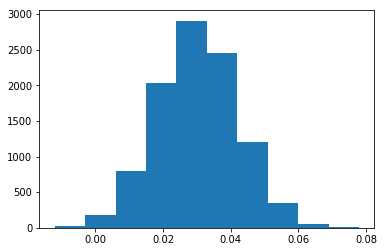

In [6]:
# view the sampling distribution
plt.hist(diffs);

In [7]:
# create an array for our sampling distribution list
diffs = np.array(diffs)

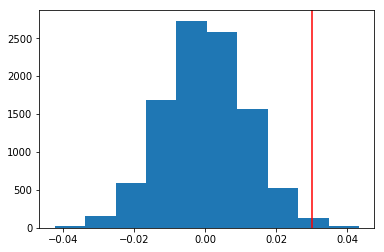

In [8]:
# simulating from the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

# view the NULL distribution
plt.hist(null_vals) # null distribution
plt.axvline(x=obs_diff, color ='red'); # our observed statistics

In [9]:
# find the p-value
(null_vals > obs_diff).mean()

0.0070000000000000001

**With Type I error rate of 0.05, we have sufficient to reject the null hypothesis.**

**Based on the result, it looks like Audacity should launch the new version of the home page.**